<a href="https://colab.research.google.com/github/manishmcsa/Convolution-Neural-Network-/blob/main/CNN_EMNIST_NO_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importing Libraries
import torch # Importing Pytorch library
import torch.nn as nn # import torch library for neyral nets
import torch.nn.functional as F # Importing torch library for performing arthmetic 
import torch.optim as optim  # implementing various optimization algorithms
import torchvision as torchvision
from torchvision import datasets, transforms # package consists of popular datasets, model architectures, and common image transformations for computer vision

In [21]:
#Building Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) #input = 28*28*1  OUtput - 26*26*10 
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) #input = 26*26*10  OUtput - 24*24*10 
        self.pool1 = nn.MaxPool2d(2, 2) #Input :24*24*10  Output : 12*12*10
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) #input = 12*12*10  OUtput - 10*10*20
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) #input = 10*10*20  OUtput - 8*8*20 
        self.pool2 = nn.MaxPool2d(2, 2) #Input : 8*8*20   Output: 4*4*20
        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) #input = 4*4*20  OUtput - 2*2*30 
        self.pool3 = nn.AvgPool2d(2, 2) # Input: 2*2*30 Ouput:1*1*30
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=10, kernel_size=1) #input = 1*1*30  OUtput - 1*1*10 

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) # forward activation function using relu
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))) # forward activation function using relu
        x = self.pool3((F.relu(self.conv5(x)))) # forward activation function using relu
        x = F.relu(self.conv6(x)) # forward activation function using relu
        x = x.view(-1, 10) # reshape tensor for -1 is nu,mber of rows and 10 is column value i.e. predictions
        return F.log_softmax(x)

In [22]:
# undesratnding and printing the network structure and summary
!pip install torchsummary # package to print model summary
from torchsummary import summary # package to print model summary
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
model=Net().to(device) #sending model to GPU
summary(model, input_size=(1, 28, 28)) # printing model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
         MaxPool2d-3           [-1, 10, 12, 12]               0
            Conv2d-4           [-1, 20, 10, 10]           1,820
            Conv2d-5             [-1, 20, 8, 8]           3,620
         MaxPool2d-6             [-1, 20, 4, 4]               0
            Conv2d-7             [-1, 30, 2, 2]           5,430
         AvgPool2d-8             [-1, 30, 1, 1]               0
            Conv2d-9             [-1, 10, 1, 1]             310
Total params: 12,190
Trainable params: 12,190
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.05
Estimated Total Size (MB): 0.18
---------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [28]:
torch.manual_seed(1)
batch_size = 256 # initializing batch size

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # defining data dictionary of specified arguments
# Download Trainset

train_loader = torch.utils.data.DataLoader(                 # downloading the train dataset
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [29]:
batch = next(iter(train_loader)) # defining the itererator to get 1batch of image sequentially
images,labels=batch              # mapping imgaes and labels in batch

labels: tensor([6, 1, 4, 0, 7, 1, 8, 9, 0, 1, 2, 4, 2, 5, 9, 3, 9, 5, 1, 4, 1, 1, 3, 3,
        2, 4, 3, 7, 8, 8, 1, 1, 4, 5, 4, 5, 0, 1, 0, 0, 7, 3, 7, 5, 0, 4, 1, 5,
        3, 7, 9, 4, 6, 2, 6, 8, 5, 1, 5, 0, 0, 0, 3, 9, 9, 2, 4, 9, 2, 0, 3, 6,
        5, 1, 9, 8, 9, 3, 1, 6, 6, 1, 0, 3, 8, 0, 9, 8, 5, 3, 3, 0, 8, 4, 1, 9,
        7, 0, 2, 4, 8, 4, 7, 8, 5, 6, 1, 8, 5, 8, 3, 5, 0, 3, 0, 4, 7, 4, 3, 8,
        4, 7, 1, 5, 0, 5, 5, 7, 8, 4, 2, 7, 9, 4, 1, 8, 1, 1, 8, 1, 3, 7, 8, 3,
        4, 3, 1, 1, 0, 8, 3, 9, 1, 9, 5, 9, 2, 5, 4, 7, 0, 2, 9, 4, 3, 5, 5, 1,
        1, 2, 4, 9, 5, 3, 5, 1, 2, 0, 3, 2, 0, 5, 2, 6, 6, 0, 0, 4, 6, 9, 8, 1,
        2, 1, 1, 2, 8, 6, 7, 2, 6, 8, 2, 6, 9, 8, 5, 1, 1, 3, 5, 3, 5, 0, 2, 5,
        4, 4, 3, 7, 9, 8, 9, 1, 0, 2, 0, 6, 7, 7, 7, 8, 0, 0, 2, 1, 9, 1, 7, 3,
        0, 4, 8, 7, 4, 2, 0, 4, 0, 4, 1, 4, 4, 7, 6, 8])


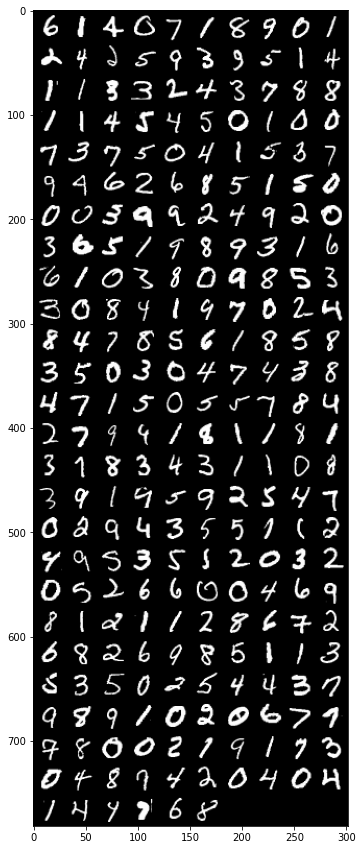

In [30]:
import matplotlib.pyplot as plt    #importing library to plot
import numpy as np                 # importing numpy library
grid = torchvision.utils.make_grid(images, nrow=10) # making grid of images with 10 rows
plt.figure(figsize=(15,15)) # dfeining the size of image to plot
plt.imshow(np.transpose(grid, (1,2,0))) # plot/how the image
print('labels:', labels) # printing the labels

In [26]:
# getting the number of correct prediction w.r.t to labels
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item() # pred.argmax will give value of highest prob of value predicted and compares with labels, 
                                                     # sum will keep adding the correct values and item will give the result of sum

In [31]:
#train_loader = torch.utils.data.DataLoader(train_loader, batch_size=batch_size)
network=Net()           # creating object of Network class
optimizer = optim.Adam(network.parameters(), lr=0.01) #initializing optimizer

for epoch in range(20): # loopng epoches

    total_loss = 0                      #Initializing variable to calculate total loss
    total_correct = 0                   #Initializing variable to calculate total correct

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images,labels=images.to(device),labels.to(device) # mapping image and labels data to GPU
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()  #zero_grad() is to restart looping without losses from last step during training model 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item() # calculate total loss in an epoch
        total_correct += get_num_correct(preds, labels)  #calculate total correct in an epoch training

    print(                                          #printing epochwise total loss and total correct w.r.t labels
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct: 21445 loss: 412.1645036935806
epoch 1 total_correct: 23007 loss: 390.59226286411285
epoch 2 total_correct: 23166 loss: 388.3785228729248
epoch 3 total_correct: 23276 loss: 386.9667181968689
epoch 4 total_correct: 23281 loss: 387.16888451576233
epoch 5 total_correct: 23349 loss: 386.1867069005966
epoch 6 total_correct: 23352 loss: 385.70687878131866
epoch 7 total_correct: 23342 loss: 386.02344822883606
epoch 8 total_correct: 23372 loss: 385.14134430885315
epoch 9 total_correct: 23402 loss: 385.0333514213562
epoch 10 total_correct: 23396 loss: 385.1026176214218
epoch 11 total_correct: 23395 loss: 384.8520487546921
epoch 12 total_correct: 23402 loss: 385.0216165781021
epoch 13 total_correct: 23446 loss: 384.58726739883423
epoch 14 total_correct: 23412 loss: 384.67998254299164
epoch 15 total_correct: 23457 loss: 384.19326066970825
epoch 16 total_correct: 23375 loss: 385.034178853035
epoch 17 total_correct: 23385 loss: 385.1512986421585
epoch 18 total_correct: 23408 l